<a href="https://colab.research.google.com/github/EstTec85/C-mputo_nube_Tec_Monterrey/blob/main/Actividad_4_de_las_Semanas_5_y_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte I: Partición, análisis y pre-procesamiento de los datos.

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/content/sample_data/tec_data/SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [8]:
df_Aleman = df
df_Aleman = df_Aleman.rename(columns={'laufkont' : 'status',
                   'laufzeit' : 'duration',
                   'moral' : 'credit_history',
                   'verw' : 'purpose',
                   'hoehe' :'amount',
                   'sparkont' : 'savings',
                   'beszeit' : 'employment_duration',
                   'rate' : 'installment_rate',
                   'famges' : 'personal_status_sex',
                   'buerge' : 'other_debtors',
                   'wohnzeit' : 'present_residence',
                   'verm' : 'property',
                   'alter' : 'age',
                   'weitkred' : 'other_installment_plans',
                   'wohn' : 'housing',
                   'beruf' : 'job',
                   'pers' : 'people_liable',
                   'telef' : 'telephone',
                   'gastarb' : 'foreign_worker',
                   'kredit'  : 'credit_risk'})


In [9]:
df_Aleman

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,bishkred,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


**Id (id)**: Identificador único de las entradas, utilizado para la evaluación. Es una variable numérica.
Status (laufkont): Estado de la cuenta corriente del deudor con el banco. Es una variable categórica con 4 niveles:
* 1: sin cuenta corriente
* 2: ... < 0 DM
* 3: 0 <= ... < 200 DM
* 4: ... >= 200 DM / salario por al menos 1 año

**Duration (laufzeit)**: Duración del crédito en meses. Es una variable numérica.

**Credit History (moral)**: Historial de cumplimiento con contratos de crédito previos o concurrentes. Es una variable categórica con 5 niveles:
* 0: retraso en el pago en el pasado

* 1: cuenta crítica/otros créditos en otros lugares

* 2: no se han tomado créditos/todos los créditos pagados debidamente

* 3: créditos existentes pagados debidamente hasta ahora

* 4: todos los créditos en este banco pagados debidamente

**Purpose (verw)**: Propósito para el cual se necesita el crédito. Es una variable categórica con 11 niveles:

* 0: otros
* 1: coche (nuevo)
* 2: coche (usado)
* 3: muebles/equipamiento
* 4: radio/televisión
* 5: electrodomésticos
* 6: reparaciones
* 7: educación
* 8: vacaciones
* 9: reciclaje profesional
* 10: negocio

**Amount (hoehe)**: Cantidad de crédito en DM. Es una variable numérica.

**Savings (sparkont)**: Ahorros del deudor. Es una variable categórica con 5 niveles:

* 1: desconocido/sin cuenta de ahorros
* 2: ... < 100 DM
* 3: 100 <= ... < 500 DM
* 4: 500 <= ... < 1000 DM
* 5: ... >= 1000 DM

**Employment Duration (beszeit)**: Duración del empleo del deudor con el empleador actual. Es una variable categórica con 5 niveles:

* 1: desempleado
* 2: < 1 año
* 3: 1 <= ... < 4 años
* 4: 4 <= ... < 7 años
* 5: >= 7 años

**Installment Rate (rate)**: Cuotas de crédito como porcentaje de los ingresos disponibles del deudor. Es una variable categórica con 4 niveles:

* 1: >= 35%
* 2: 25 <= ... < 35%
* 3: 20 <= ... < 25%
* 4: < 20%

**Personal Status Sex (famges)**: Información combinada sobre el sexo y el estado civil. Es una variable categórica con 4 niveles:

* 1: masculino: divorciado/separado
* 2: femenino: no soltero o masculino: soltero
* 3: masculino: casado/viudo
* 4: femenino: soltero

**Other Debtors (buerge)**: Si hay otro deudor o un garante para el crédito. Es una variable categórica con 3 niveles:

* 1: ninguno
* 2: co-solicitante
* 3: garante

**Present Residence (wohnzeit)**: Tiempo (en años) que el deudor vive en la residencia actual. Es una variable categórica con 4 niveles:

* 1: < 1 año
* 2: 1 <= ... < 4 años
* 3: 4 <= ... < 7 años
* 4: >= 7 años

**Property (verm)**: La propiedad más valiosa del deudor. Es una variable categórica con 4 niveles:

* 1: desconocido / sin propiedad
* 2: coche u otro
* 3: ahorros de la soc. de construcción / seguro de vida
* 4: bienes raíces

**Age (alter)**: Edad en años. Es una variable numérica.
Other Installment Plans (weitkred): Planes de cuotas de proveedores distintos al banco que otorga el crédito. Es una variable categórica con 3 niveles:

* 1: banco
* 2: tiendas
* 3: ninguno

**Housing (wohn)**: Tipo de vivienda en la que vive el deudor. Es una variable categórica con 3 niveles:

* 1: gratis
* 2: alquiler
* 3: propia

**Number Credits (bishkred)**: Número de créditos incluido el actual que el deudor tiene (o tuvo) en este banco. Es una variable categórica con 4 niveles:

* 1: 1
* 2: 2-3
* 3: 4-5
* 4: >= 6

**Job (beruf)**: Calidad del trabajo del deudor. Es una variable categórica con 4 niveles:

* 1: desempleado/no cualificado - no residente
* 2: no cualificado - residente
* 3: empleado cualificado/oficial
* 4: gerente/autónomo/muy cualificado

**People Liable (pers)**: Número de personas que dependen financieramente del deudor (es decir, tienen derecho a mantenimiento). Es una variable categórica con 2 niveles:

* 1: 3 o más
* 2: 0 a 2

**Telephone (telef)**: Si hay una línea telefónica fija registrada a nombre del deudor. Es una variable categórica con 2 niveles:
* 1: no
* 2: sí (bajo nombre del cliente)

**Foreign Worker (gastarb)**: Si el deudor es un trabajador extranjero. Es una variable categórica con 2 niveles:
* 1: sí
* 2: no

**Credit Risk (kredit)**: Si el contrato de crédito se ha cumplido (bueno) o no (malo). Es la variable objetivo categórica con 2 niveles:

* 0: malo
* 1: bueno

In [18]:
X = df_Aleman.drop('credit_risk', axis=1)  # Features
y = df_Aleman['credit_risk']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
numerical_cols = df_Aleman.select_dtypes(include=['int64', 'float64']).columns
categorical_cols =df_Aleman.select_dtypes(include=['object', 'bool']).columns

In [19]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,bishkred,job,people_liable,telephone,foreign_worker
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2.587143,21.308571,2.548571,2.872857,3319.404286,2.081429,3.380000,2.990000,2.675714,1.137143,2.854286,2.39000,35.534286,2.680000,1.952857,1.412857,2.937143,1.852857,1.431429,1.968571
std,1.258837,12.139706,1.077371,2.783480,2830.077730,1.576998,1.217963,1.104633,0.713037,0.464528,1.095665,1.04992,11.162871,0.699806,0.526065,0.573228,0.654285,0.354502,0.495630,0.174598
min,1.000000,4.000000,0.000000,0.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1346.750000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2330.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.500000,4.000000,3.000000,4212.750000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


**Variables Numéricas**
* Id: No se requiere transformación, pero podría no incluirse en el modelo ya que es solo un identificador.

* Duration: Escalar, ya que es una variable numérica que podría tener una distribución amplia.

* Amount: Escalar, debido a la posible amplia gama de valores.

* Age: Escalar, ya que las edades pueden variar significativamente.

**Variables Categóricas**

Para las variables categóricas, aplicaremos codificación **One-Hot** para transformarlas en un formato que los modelos puedan interpretar mejor. Este enfoque es útil para las variables categóricas sin un orden inherente. Sin embargo, para aquellas con un orden o nivel (como 'Employment Duration'), podríamos considerar la codificación ordinal si creemos que el orden tiene un impacto significativo en el riesgo crediticio.

* Status: Codificación One-Hot.

* Credit History: Codificación One-Hot.

* Purpose: Codificación One-Hot.

* Savings: Codificación One-Hot.

* Employment Duration: Codificación One-Hot (o codificación ordinal si consideramos el orden importante).

* Installment Rate: Codificación One-Hot.

* Personal Status Sex: Codificación One-Hot.

* Other Debtors: Codificación One-Hot.

* Present Residence: Codificación One-Hot.

* Property: Codificación One-Hot.

* Other Installment Plans: Codificación One-Hot.

* Housing: Codificación One-Hot.

* Number Credits: Codificación One-Hot.

* Job: Codificación One-Hot.

* People Liable: Codificación One-Hot.

* Telephone: Codificación One-Hot.

* Foreign Worker: Codificación One-Hot.

**Variable Objetivo**

* Credit Risk: No se requiere transformación para la variable objetivo, pero es crucial asegurarse de que esté correctamente codificada como categórica si no es el caso.

**Transformaciones Generales**

* **Escalado de Variables Numéricas**: Para las variables numéricas, utilizaríamos un escalador, como **StandardScaler** o **MinMaxScaler**, para asegurar que todas las variables numéricas estén en una escala similar y no sesguen el modelo.

* **Codificación de Variables Categóricas**: Utilizaremos la codificación **One-Hot** para las variables categóricas para convertirlas en un formato binario que los modelos de aprendizaje automático puedan utilizar de manera efectiva.
Al aplicar estas transformaciones mediante un **Pipeline** en Sklearn, podemos preparar eficientemente los datos para el modelado, asegurando que cada tipo de variable sea tratado de manera adecuada y mejorando potencialmente el rendimiento del modelo.

# Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Lista de modelos a evaluar
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Hiperparámetros para GridSearchCV
param_grids = {
    "RandomForest": {"classifier__n_estimators": [100, 200], "classifier__max_depth": [None, 5, 10]},
    "LogisticRegression": {"classifier__C": [0.1, 1, 10]},
    "SVM": {"classifier__C": [0.1, 1, 10]},
    "GradientBoosting": {"classifier__n_estimators": [100, 200], "classifier__learning_rate": [0.05, 0.1]}
}

# Guardaremos los mejores clasificadores y sus métricas en este DataFrame
results_df = pd.DataFrame(columns=["Classifier", "Best Hyperparameters", "Recall", "Accuracy"])

# Entrenamiento y evaluación de cada modelo
for classifier_name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])

    param_grid = param_grids[classifier_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_classifier = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_recall = grid_search.best_score_

    # Calculando la precisión
    accuracy_scores = cross_val_score(best_classifier, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = accuracy_scores.mean()

    # Añadiendo los resultados al DataFrame
    results_df = results_df.append({
        "Classifier": classifier_name,
        "Best Hyperparameters": best_params,
        "Recall": best_recall,
        "Accuracy": mean_accuracy
    }, ignore_index=True)

# Imprimir los resultados
print(results_df)

# Guardar los nombres de los algoritmos en una variable global
global classifier_names
classifier_names = list(classifiers.keys())


<ipython-input-37-4c9fc9e728f6>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-4c9fc9e728f6>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-4c9fc9e728f6>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


           Classifier                               Best Hyperparameters  \
0        RandomForest  {'classifier__max_depth': 5, 'classifier__n_es...   
1  LogisticRegression                             {'classifier__C': 0.1}   
2                 SVM                             {'classifier__C': 0.1}   
3    GradientBoosting  {'classifier__learning_rate': 0.05, 'classifie...   

     Recall  Accuracy  
0  0.965533  0.752857  
1  0.904576  0.761429  
2  1.000000  0.702857  
3  0.910678  0.765714  


<ipython-input-37-4c9fc9e728f6>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [27]:
results_df

,Classifier,Best Hyperparameters,Recall,Accuracy
0,RandomForest,"{'classifier__max_depth': 5, 'classifier__n_es...",0.967553,0.744286
1,LogisticRegression,{'classifier__C': 0.1},0.904576,0.761429
2,SVM,{'classifier__C': 0.1},1.000000,0.702857
3,GradientBoosting,"{'classifier__learning_rate': 0.05, 'classifie...",0.910678,0.762857


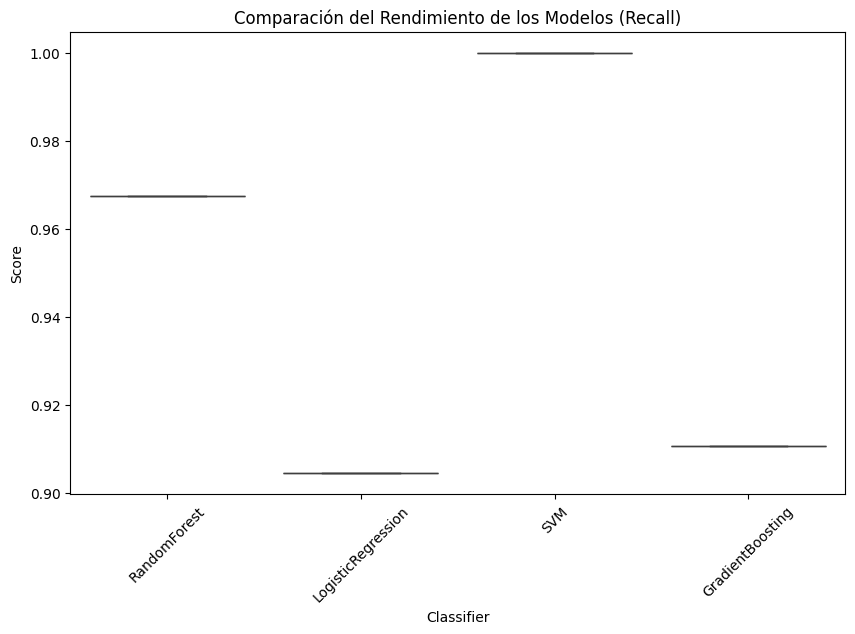

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


# Transformar el DataFrame para que sea compatible con Seaborn boxplot
melted_results_df = results_df.melt(id_vars=["Classifier"], value_vars=["Recall", "Accuracy"],
                                    var_name="Metric", value_name="Score")

# Filtrar por la métrica
filtered_results = melted_results_df[melted_results_df['Metric'] == 'Recall']

# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_results, x='Classifier', y='Score')
plt.title('Comparación del Rendimiento de los Modelos (Recall)')
plt.xticks(rotation=45)
plt.show()


#a. ¿Qué error se considera más costoso por parte del banco?
* El error más costoso para el banco, según la matriz de costos, es clasificar incorrectamente a un cliente como bueno (falso positivo) cuando en realidad es malo, con un costo asociado de 5. En contraste, clasificar a un cliente como malo (falso negativo) cuando es bueno tiene un costo de 1.

#b. ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes?
* Las métricas importantes a considerar, dada la diferencia en los costos de los errores, incluyen el recall (especialmente para identificar a los malos clientes correctamente) y la precisión. Sin embargo, dada la mayor penalización de los falsos positivos, el recall para la clase "mala" se convierte en crítico, junto con el costo total basado en la matriz de costos.

#c. Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

* Otras métricas que podrían considerarse incluyen el F1-score, que combina recall y precisión en una sola métrica, el área bajo la curva ROC (AUC-ROC) para medir la capacidad del modelo de distinguir entre las clases, y el área bajo la curva Precision-Recall (AUC-PR) para situaciones con desequilibrio de clases significativo. La página de Sklearn sobre evaluación de modelos ofrece una visión completa de las métricas disponibles: **Sklearn Model Evaluation**.

#  Parte III: Modelos con técnicas para clases no balanceadas

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate

#  lista de clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Resultados almacenados en este DataFrame
results_df = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall"])

# Entrenamiento y evaluación de cada modelo con SMOTE
for classifier_name, classifier in classifiers.items():
    model_with_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                          ('smote', SMOTE(random_state=42)),
                                          ('classifier', classifier)])

    scores = cross_validate(model_with_smote, X_trainval, y_trainval, cv=5,
                            scoring=['accuracy', 'precision', 'recall'])

    # Calcular la media de cada métrica
    accuracy_mean = scores['test_accuracy'].mean()
    precision_mean = scores['test_precision'].mean()
    recall_mean = scores['test_recall'].mean()

    # Añadiendo los resultados al DataFrame
    results_df = results_df.append({
        "Classifier": classifier_name,
        "Accuracy": accuracy_mean,
        "Precision": precision_mean,
        "Recall": recall_mean
    }, ignore_index=True)

# Mostrar los resultados
print(results_df)


<ipython-input-46-21fe8374c928>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-21fe8374c928>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-21fe8374c928>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


           Classifier  Accuracy  Precision    Recall
0        RandomForest  0.745882   0.798995  0.850235
1  LogisticRegression  0.717647   0.850793  0.723971
2                 SVM  0.714118   0.810573  0.772767
3    GradientBoosting  0.734118   0.805371  0.818260


<ipython-input-46-21fe8374c928>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [47]:
result_cv = results_df
result_cv

,Classifier,Accuracy,Precision,Recall
0,RandomForest,0.745882,0.798995,0.850235
1,LogisticRegression,0.717647,0.850793,0.723971
2,SVM,0.714118,0.810573,0.772767
3,GradientBoosting,0.734118,0.805371,0.818260


# Parte IV: Mejor modelo

El modelo **GradientBoosting** parece tener el mejor rendimiento general considerando tanto el recall como la precisión. Este modelo ha logrado el mayor recall de los cuatro, lo que indica una **alta tasa de verdaderos positivos** en relación con los falsos negativos, lo cual es importante si, por ejemplo, el objetivo es **minimizar el riesgo crediticio** al no otorgar créditos a solicitantes que probablemente incumplan. La precisión también es comparable a la de los otros modelos, lo que indica un equilibrio adecuado entre precisión y recal

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE



# Definir el pipeline con SMOTE y GradientBoostingClassifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Definir el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Ejecutar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

# Guardar el pipeline con el mejor modelo encontrado
best_pipeline = grid_search.best_estimator_

# Mostrar los mejores parámetros y el mejor recall
print("Mejores hiperparámetros:", best_params)
print("Mejor recall:", best_recall)

# Guardar el mejor pipeline para uso posterior, por ejemplo con joblib
import joblib
joblib.dump(best_pipeline, 'best_gradient_boosting_model.pkl')


Mejores hiperparámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Mejor recall: 0.8620078334364049


['best_gradient_boosting_model.pkl']

In [52]:
import plotly.figure_factory as ff
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Evaluar el modelo en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el informe de clasificación en DataFrame para visualización
metrics_df = pd.DataFrame(class_report).transpose()

# Mostrar métricas
print(metrics_df)

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
fig = ff.create_annotated_heatmap(conf_matrix, x=['Predicted Negative', 'Predicted Positive'], y=['Actual Negative', 'Actual Positive'], colorscale='Viridis')

# Añadir título
fig.update_layout(title_text='Confusion Matrix with Plotly', title_x=0.5)

# Mostrar figura
fig.show()



              precision    recall  f1-score  support
0              0.622222  0.636364  0.629213    44.00
1              0.847619  0.839623  0.843602   106.00
accuracy       0.780000  0.780000  0.780000     0.78
macro avg      0.734921  0.737993  0.736408   150.00
weighted avg   0.781503  0.780000  0.780715   150.00


In [53]:
metrics_df

,precision,recall,f1-score,support
0,0.622222,0.636364,0.629213,44.00
1,0.847619,0.839623,0.843602,106.00
accuracy,0.780000,0.780000,0.780000,0.78
macro avg,0.734921,0.737993,0.736408,150.00
weighted avg,0.781503,0.780000,0.780715,150.00


In [56]:
# Definir el pipeline con SMOTE y GradientBoostingClassifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Definir el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Ejecutar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

# Extraer la importancia de las características del modelo
feature_importances = best_pipeline.named_steps['classifier'].feature_importances_

# Extraer los nombres de las características transformadas después de OneHotEncoding
feature_names_transformed = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para la importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df.head())





                Feature  Importance
0           num__status    0.221186
4           num__amount    0.123404
1         num__duration    0.097597
12             num__age    0.088021
2   num__credit_history    0.067462


In [57]:
feature_importance_df

,Feature,Importance
0,num__status,0.221186
4,num__amount,0.123404
1,num__duration,0.097597
12,num__age,0.088021
2,num__credit_history,0.067462
5,num__savings,0.058249
7,num__installment_rate,0.049933
6,num__employment_duration,0.045327
11,num__property,0.044145
3,num__purpose,0.041628


In [58]:
import plotly.express as px

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Crear el gráfico de barras con Plotly
fig = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances', labels={'Feature': 'Variable', 'Importance': 'Importancia'})

# Mostrar el gráfico
fig.show()


#Conclusiones

La **tabla de métricas** muestra que el modelo tiene una precisión general del 78% con un recall de 78% para la clase positiva y 63.6% para la clase negativa. Esto sugiere que el modelo es relativamente **equilibrado** en su capacidad para identificar ambas clases, pero tiende a ser mejor identificando la clase positiva.

La matriz de confusión visualizada con Plotly indica que el modelo predijo correctamente 89 de los casos positivos y 28 de los negativos, pero hubo 17 falsos negativos y 16 falsos positivos. Esto confirma lo observado en la tabla de métricas: **el modelo es mejor prediciendo la clase positiva**.

El gráfico de importancia de variables muestra que las variables más influyentes en la predicción del modelo son **num_status** y **num_amount**. Esto puede indicar que el estado de la cuenta corriente y la cantidad del crédito son los factores más significativos que el modelo está utilizando para hacer sus predicciones.

Al compararlo con el estudio que realizo **IEEE**, puedo decir que a pesar que ellos decidieron utilizar Anova y yo GB, los resultados son muy parecidos,el modelo lo que va hacer es buscar mas las clases positivas que es el fin del modelo.